# Find stats

for hichip figure plus supplements

05/08/2020

05/12/2020 - update how we find the promoter regions

In [1]:
import os, glob
import pandas as pd
import numpy as np
import pybedtools
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
save_dir = '../data/processed/fig2_hichip'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

In [3]:
loop_files = glob.glob('../data/interim/merged/loops/*.loops.csv')
anchor_annon_dir = '../data/interim/annon/anchor_atac'
anchor_annon_files = glob.glob('../data/interim/annon/anchor_atac/*_annon.bed')
promoter_annon_dir = '../data/interim/annon/promoter_anchors/'
promoter_annon_files = glob.glob('../data/interim/annon/promoter_anchors/promoter_*_annon.bed')
# anchor_annon_files
anchor_dir = '../data/interim/merged/anchors/'
anchor_files = glob.glob('../data/interim/merged/anchors/*.anchors.csv')

In [15]:
normal_tissues = [ "Astrocytes","H9_D0","H9_D10","H9_D2","H9_D28","H9_D4","SL_D0","SL_D2","SLC_D0","SLC_D2"]
normal_tissues = [ "Astrocytes","H9_D0","H9_D10","H9_D2","H9_D28","SL_D0","SL_D2","SLC_D0","SLC_D2"]



# 1. Find Stats of of distribution of loop width

In [5]:
%%time
loop_width_df = pd.DataFrame(columns=['loop_width','tissue'])
for loop_file in sorted(loop_files):
    loop_filename = os.path.basename(loop_file)
    tissue = loop_filename.split('.')[0]
    loop_df = pd.read_csv(loop_file, index_col=0)
    loop_df[['chrA','startA','stopA']] = loop_df.source.str.split('_',expand=True)
    loop_df[['chrB','startB','stopB']] = loop_df.target.str.split('_',expand=True)
    loop_df['loop_width'] = loop_df.startB.map(int) - loop_df.startA.map(int)
    loop_df['tissue'] = tissue
    loop_width_df = pd.concat([loop_width_df, loop_df[['loop_width', 'tissue']]])
    print(tissue, loop_width_df.shape)
    


/Users/mguo123/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Astrocytes (1839205, 2)
H9_D0 (3157921, 2)
H9_D10 (3870454, 2)
H9_D2 (10590560, 2)
H9_D28 (11847519, 2)
SLC_D0 (14506601, 2)
SLC_D2 (18788756, 2)
SL_D0 (19976355, 2)
SL_D2 (25300784, 2)
CPU times: user 3min 54s, sys: 5.95 s, total: 4min
Wall time: 3min 9s


In [12]:
loop_width_normal_df = loop_width_df[loop_width_df.tissue.isin(normal_tissues)]
print(loop_width_df.shape, loop_width_normal_df.shape)
loop_width_df.to_csv(os.path.join(save_dir, 'loop_width_df.csv'))
loop_width_normal_df.to_csv(os.path.join(save_dir, 'loop_width_normal_df.csv'))
# loop_width_df[:5]
# loop_width_df_test = loop_width_df[(loop_width_df.tissue=='Air')|(loop_width_df.tissue=='MC') ]

(25300784, 2) (25300784, 2)


# 2. Loop and Anchor statistics

for each tissue (split normal and all) get following stats
- num unique loops
- num unique anchors
- num common loops
- num common anchors 
- num loops
- num anchors 	

summative stats (across all tissues)
    - total number of distinct anchors
    - total number of distinct loops

In [7]:
%%time
# first get set of all loops
# all_loops, all_loops_normal = set(),set()
# all_anchors, all_anchors_normal = set(),set()

tissues = []
loops_all_df = pd.DataFrame(columns=['loop_name','tissue'])
anchors_all_df = pd.DataFrame(columns=['anchors','tissue'])

# tissue_info_dict = {}
for loop_file in sorted(loop_files):
    loop_filename = os.path.basename(loop_file)
    tissue = loop_filename.split('.')[0]
    tissues.append(tissue)
    anchor_file = os.path.join(anchor_dir, tissue+'.anchors.csv')
    loop_df = pd.read_csv(loop_file, index_col=0)
    loop_df['loop_name'] = loop_df.apply(lambda row: '::'.join(sorted([row.source,row.target])),axis=1)
    loop_df['tissue'] = tissue
    
    anchor_df = pd.read_csv(anchor_file, index_col=0)
    anchor_df['tissue'] = tissue
   
    loops_all_df = pd.concat([loops_all_df, loop_df[['loop_name', 'tissue']]])
    anchors_all_df = pd.concat([anchors_all_df, anchor_df[['anchors', 'tissue']]])
    print(tissue)
    
#     tissue_info_dict[tissue] = [loop_df,anchor_df,anchor_to_count_dict]
    
#     all_loops  = all_loops.union(set(loop_df.loop_name))
#     all_anchors  = all_anchors.union(set(anchor_df.anchors))
                                         
#     if tissue in normal_tissues:
#         all_loops_normal = all_loops_normal.union(set(loop_df.loop_name))
#         all_anchors_normal = all_anchors_normal.union(set(anchor_df.anchors))                            
    

Astrocytes
H9_D0
H9_D10
H9_D2
H9_D28
SLC_D0
SLC_D2
SL_D0
SL_D2
CPU times: user 12min 56s, sys: 3.82 s, total: 13min
Wall time: 12min 16s


In [10]:
all_loops = loops_all_df.loop_name.unique()
all_loops_normal = loops_all_df.loop_name[loops_all_df.tissue.isin(normal_tissues)].unique()
all_anchors = anchors_all_df.anchors.unique()
all_anchors_normal = anchors_all_df.anchors[anchors_all_df.tissue.isin(normal_tissues)].unique()


In [14]:
loops_all_df

,loop_name,tissue,count
1,chr10_100000000_100005000::chr10_100015000_100...,Astrocytes,1
16,chr10_100000000_100005000::chr10_100160000_100...,Astrocytes,1
18,chr10_100000000_100005000::chr10_100195000_100...,Astrocytes,1
143,chr10_10000000_10005000::chr10_11035000_11040000,Astrocytes,1
199,chr10_1000000_1005000::chr10_1020000_1025000,Astrocytes,1
...,...,...,...
80042894,chrX_100460000_100465000::chrX_99995000_100000000,SL_D2,1
80042906,chrX_100535000_100540000::chrX_99995000_100000000,SL_D2,1
80042911,chrX_100590000_100595000::chrX_99995000_100000000,SL_D2,1
80042912,chrX_100635000_100640000::chrX_99995000_100000000,SL_D2,1


In [13]:
# get loop/anchor by tissue binary matrix, 1 or 0 depending on whether loop/anchor exists in tissue
loops_all_df['count']=1
loop_counts = loops_all_df.pivot_table(index='loop_name', columns='tissue',values='count', fill_value=0)

anchors_all_df['count']=1
anchor_counts = anchors_all_df.pivot_table(index='anchors', columns='tissue',values='count', fill_value=0)

In [16]:
loop_counts_normal = loop_counts[normal_tissues]
anchor_counts_normal = anchor_counts[normal_tissues]

In [17]:
loop_counts['num_tissues'] = loop_counts.sum(axis=1)
loop_counts_normal['num_tissues'] = loop_counts_normal.sum(axis=1)
anchor_counts['num_tissues'] = anchor_counts.sum(axis=1)
anchor_counts_normal['num_tissues'] = anchor_counts_normal.sum(axis=1)

In [18]:
all_counts_results_df = pd.DataFrame()
all_counts_results_df['num_loops'] = loop_counts.sum(axis=0)
all_counts_results_df['num_unique_loops'] = loop_counts[loop_counts.num_tissues==1].sum()
all_counts_results_df['num_common_loops'] = loop_counts[loop_counts.num_tissues==(loop_counts.shape[1]-1)].sum()
all_counts_results_df['num_anchors'] = anchor_counts.sum(axis=0)
all_counts_results_df['num_unique_anchors'] = anchor_counts[anchor_counts.num_tissues==1].sum()
all_counts_results_df['num_common_anchors'] = anchor_counts[anchor_counts.num_tissues==(anchor_counts.shape[1]-1)].sum()
all_counts_results_df.drop('num_tissues',inplace=True)

In [19]:
all_counts_results_normal_df = pd.DataFrame()
all_counts_results_normal_df['num_loops'] = loop_counts_normal.sum(axis=0)
all_counts_results_normal_df['num_unique_loops'] = loop_counts_normal[loop_counts_normal.num_tissues==1].sum()
all_counts_results_normal_df['num_common_loops'] = loop_counts_normal[loop_counts_normal.num_tissues==(loop_counts_normal.shape[1]-1)].sum()
all_counts_results_normal_df['num_anchors'] = anchor_counts_normal.sum(axis=0)
all_counts_results_normal_df['num_unique_anchors'] = anchor_counts_normal[anchor_counts_normal.num_tissues==1].sum()
all_counts_results_normal_df['num_common_anchors'] = anchor_counts_normal[anchor_counts_normal.num_tissues==(anchor_counts_normal.shape[1]-1)].sum()
all_counts_results_normal_df.drop('num_tissues',inplace=True)

In [20]:
all_counts_results_df.to_csv(os.path.join(save_dir, 'all_counts_results_df.csv'))
all_counts_results_normal_df.to_csv(os.path.join(save_dir, 'all_counts_results_normal_df.csv'))

In [21]:

print('Total # of loops all tissues: ',all_counts_results_df.num_loops.sum())
print('Total # unique loops all tissues: ',all_counts_results_df.num_unique_loops.sum())
print('Total # common loops all tissues: ',all_counts_results_df.num_common_loops[0])

print('Total # of anchors all samples: ',all_counts_results_df.num_anchors.sum())
print('Total # unique anchors all tissues: ',all_counts_results_df.num_unique_anchors.sum())
print('Total # common anchors all tissues: ',all_counts_results_df.num_common_anchors[0])

print()

print('Total # of loops normal tissues : ',all_counts_results_normal_df.num_loops.sum())
print('Total # unique loops normal tissues: ',all_counts_results_normal_df.num_unique_loops.sum())
print('Total # common loops normal tissues: ',all_counts_results_normal_df.num_common_loops[0])


print('Total # of anchors all samples normal: ',all_counts_results_normal_df.num_anchors.sum())
print('Total # unique anchors normal tissues: ',all_counts_results_normal_df.num_unique_anchors.sum())
print('Total # common anchors normal tissues: ',all_counts_results_normal_df.num_common_anchors[0])

Total # of loops all tissues:  25300784
Total # unique loops all tissues:  4438651
Total # common loops all tissues:  41329
Total # of anchors all samples:  3211257
Total # unique anchors all tissues:  21922
Total # common anchors all tissues:  103354

Total # of loops normal tissues :  25300784
Total # unique loops normal tissues:  4438651
Total # common loops normal tissues:  41329
Total # of anchors all samples normal:  3211257
Total # unique anchors normal tissues:  21922
Total # common anchors normal tissues:  103354


## 2B. save lists of anchors and loops that have been annotated 

- find closest gene
- find common genes on loops 

In [22]:
anchors_all = anchor_counts.index
len(anchors_all)
anchors_bed = pybedtools.BedTool.from_dataframe(pd.Series(anchors_all).str.split('_',expand=True)).sort()

In [23]:
len(anchors_bed), len(anchors_all)

(541373, 541373)

In [24]:
tss_df = pd.read_csv('../data/external/gene_annon_hg19.csv',index_col=0)
tss_bed = pybedtools.BedTool.from_dataframe(tss_df[['chr','start','end', 'gene']]).sort()
len(tss_bed), len(tss_df)

(20314, 20314)

In [25]:
anchors_bed_closest_gene = anchors_bed.closest(tss_bed, d=True)
len(anchors_bed_closest_gene)
anchors_closest_gene_df = anchors_bed_closest_gene.to_dataframe()
anchors_closest_gene_df.columns = ['chr', 'start', 'stop', 'chr_tss', 'start_tss', 'stop_tss', 'gene', 'dist_to_TSS']
anchors_closest_gene_df['anchor_name'] = anchors_closest_gene_df.chr + '_' + anchors_closest_gene_df.start.map(str) + '_' + anchors_closest_gene_df.stop.map(str)
anchors_closest_gene_df.to_csv(os.path.join(save_dir, 'anchors_closest_gene_df.csv'))

In [26]:
anchors_closest_gene_df[:5]

,chr,start,stop,chr_tss,start_tss,stop_tss,gene,dist_to_TSS,anchor_name
0,chr1,15000,20000,chr1,69091,70008,OR4F5,49092,chr1_15000_20000
1,chr1,100000,105000,chr1,134901,139379,AL627309.1,29902,chr1_100000_105000
2,chr1,125000,130000,chr1,134901,139379,AL627309.1,4902,chr1_125000_130000
3,chr1,130000,135000,chr1,134901,139379,AL627309.1,0,chr1_130000_135000
4,chr1,235000,240000,chr1,134901,139379,AL627309.1,95622,chr1_235000_240000


In [27]:
anchors_bed_overlapping_gene = anchors_bed.intersect(tss_bed, wa=True, wb=True, f=0.5)
len(anchors_bed_overlapping_gene)
anchors_overlapping_gene_df = anchors_bed_overlapping_gene.to_dataframe()
anchors_overlapping_gene_df.columns = ['chr', 'start', 'stop', 'chr_tss', 'start_tss', 'stop_tss', 'gene']
anchors_overlapping_gene_df['anchor_name'] = anchors_overlapping_gene_df.chr + '_' + anchors_overlapping_gene_df.start.map(str) + '_' + anchors_overlapping_gene_df.stop.map(str)
anchors_overlapping_gene_df.to_csv(os.path.join(save_dir, 'anchors_overlapping_gene_df.csv'))

In [28]:
anchors_overlapping_gene_df[:5]

,chr,start,stop,chr_tss,start_tss,stop_tss,gene,anchor_name
0,chr1,860000,865000,chr1,861264,866445,AL645608.1,chr1_860000_865000
1,chr1,860000,865000,chr1,860260,879955,SAMD11,chr1_860000_865000
2,chr1,865000,870000,chr1,860260,879955,SAMD11,chr1_865000_870000
3,chr1,870000,875000,chr1,860260,879955,SAMD11,chr1_870000_875000
4,chr1,875000,880000,chr1,860260,879955,SAMD11,chr1_875000_880000


## 2C . common loops annotated with genes

#### all tissues

In [29]:
common_loops_df = pd.Series(loop_counts[loop_counts.num_tissues==(loop_counts.shape[1]-1)].index).str.split('::', expand=True)
common_loops_df.columns = ['source', 'target']
common_loops_df.shape

(41329, 2)

In [30]:
common_loop_anchors_df = pd.DataFrame({'anchor_name':common_loops_df.stack().reset_index(drop=True).drop_duplicates()})
common_loop_anchors_df = common_loop_anchors_df.merge(anchors_overlapping_gene_df[['anchor_name', 'gene']], how='left',on='anchor_name')
print(common_loop_anchors_df.shape)
common_loop_anchors_df= common_loop_anchors_df.dropna()
print(common_loop_anchors_df.shape)
common_loop_genes = sorted(common_loop_anchors_df.gene.unique())
print(len(common_loop_genes))
common_loop_genes_file = os.path.join(save_dir, 'common_loop_genes.txt')
with open(common_loop_genes_file, 'w') as f:
    for gene in common_loop_genes:
        f.write(gene + '\n')

(37987, 2)
(24207, 2)
9584


#### normal

In [31]:
common_loops_df_normal = pd.Series(loop_counts_normal[loop_counts_normal.num_tissues==(loop_counts_normal.shape[1]-1)].index).str.split('::', expand=True)
common_loops_df_normal.columns = ['source', 'target']
common_loops_df_normal.shape

(41329, 2)

In [32]:
common_loop_anchors_normal_df = pd.DataFrame({'anchor_name':common_loops_df_normal.stack().reset_index(drop=True).drop_duplicates()})
common_loop_anchors_normal_df = common_loop_anchors_normal_df.merge(anchors_overlapping_gene_df[['anchor_name', 'gene']], how='left',on='anchor_name')
print(common_loop_anchors_normal_df.shape)
common_loop_anchors_normal_df= common_loop_anchors_normal_df.dropna()
print(common_loop_anchors_normal_df.shape)
common_loop_normal_genes = sorted(common_loop_anchors_normal_df.gene.unique())
print(len(common_loop_normal_genes))
common_loop_normal_genes_file = os.path.join(save_dir, 'common_loop_normal_genes.txt')
with open(common_loop_normal_genes_file, 'w') as f:
    for gene in common_loop_normal_genes:
        f.write(gene + '\n')

(37987, 2)
(24207, 2)
9584


# 3. get per tissue information on anchors
- % PP	: 
- % P-PIR	: PIR = not accessible
- % PIR-PIR
- % ACCESSIBLE
- % P-P+ ACC
- % EP + ACC
- % EE + ACC
- TOTAL %

Promoter/Enhancer Annotations of HiChIP Loops
Promoters were defined as 1 kb regions centered at the TSS, and enhancers
were identified as chromHMM enhancers not overlapping with promoters in any
cell type. We annotated loop anchors as ‘other’ if the anchor did not contain a
promoter or enhancer as defined above


we define: i modified our stuff
P-P (don't care about accessibility here
9:22
P-E = P-PIRacc (so a promoter region connecting to an accessible region that is not a promoter)
9:22
E-E = PIRacc-PIRacc

Note: our promoter definition is slightly different than what max is our is 2kb upstream, +500 bp downstream


05/12/2020 - change, how we get promoter regions, to look at exon regions, 1/2 of exon must overlap with some of the anchor region

In [33]:
exon_bed = pybedtools.BedTool('../data/external/gencode.v19.exon.bed')
len(exon_bed)# 1196293

1196293

In [34]:
%%time
perc_anchor_accessible_dict = {}

for loop_file in sorted(loop_files):
    loop_filename = os.path.basename(loop_file)
    tissue = loop_filename.split('.')[0]
    print(tissue)
    loop_df = pd.read_csv(loop_file, index_col=0)
    anchor_file = os.path.join(anchor_dir, tissue+'.anchors.csv')
    anchor_df = pd.read_csv(anchor_file, index_col=0)
    anchor_df = anchor_df[['chr','start','end','anchors','sample']]#[:5]
    anchor_bed = pybedtools.BedTool.from_dataframe(anchor_df) #101559

    anchor_annon_file = os.path.join(anchor_annon_dir, tissue+'_annon.bed')
    if not os.path.exists(anchor_annon_file):
        print(tissue, 'not anchor annon file.. skipping')
        continue
    anchor_annon_df = pd.read_csv(anchor_annon_file, names=['chr', 'start', 'stop', 'name', 'atac_chr', 'atac_start', 'atac_stop'], sep='\t')
    anchor_to_count_dict = anchor_annon_df.groupby('name').name.count().to_dict()
    anchors_acc = anchor_to_count_dict.keys()
    
    
    promoter_anchor_file = os.path.join(promoter_annon_dir, 'promoter_'+tissue+'_annon.bed')
    if not os.path.exists(promoter_anchor_file):
        print(tissue, 'not promoter annon file.. skipping')
        continue
    promoter_anchor_df = pd.read_csv(promoter_anchor_file, names=['chr', 'start', 'stop', 'tss', 'anchor_chr', 'anchor_start', 
                                                             'anchor_stop', 'anchor', 'overlap'], sep='\t')
    promoter_anchors = promoter_anchor_df.anchor.unique()
#     #### PART ADDED FOR EXOM #####
#     anchor_bed_exons = anchor_bed.intersect(exon_bed,wa=True,wb=True,F=.5)# 1/2 of exon must overlap with some of the anchor region
#     exon_anchors = anchor_bed_exons.to_dataframe().name.unique()
#     promoter_anchors = np.union1d(promoter_anchors,exon_anchors)
    
#     #####
    
    anchor_df['is_P'] = anchor_df['anchors'].isin(promoter_anchors)
    anchor_df['is_acc'] = anchor_df['anchors'].isin(anchors_acc)
    anchor_df['is_Pacc'] = anchor_df['is_P'] & anchor_df['is_acc']
    anchor_df['is_PIRacc'] = (~anchor_df['is_P']) & anchor_df['is_acc']
    
    
    loop_df['source_P'] = loop_df.source.isin(promoter_anchors)
    loop_df['target_P'] = loop_df.target.isin(promoter_anchors)
    
    loop_df['source_acc'] = loop_df.source.isin(anchors_acc)
    loop_df['target_acc'] = loop_df.target.isin(anchors_acc)   
    

    loop_df['source_acc_P'] = loop_df['source_acc'] & loop_df['source_P']
    loop_df['target_acc_P'] = loop_df['target_acc'] & loop_df['target_P']
    loop_df['source_acc_PIR'] = loop_df['source_acc'] & (~loop_df['source_P'])
    loop_df['target_acc_PIR'] = loop_df['target_acc'] & (~loop_df['target_P'])
    
    
    loop_df['is_P_P'] = loop_df['source_P'] & loop_df['target_P']
    loop_df['is_P_PIR'] = loop_df['source_P'] ^ loop_df['target_P']
    loop_df['is_PIR_PIR'] = ~(loop_df['source_P'] | loop_df['target_P'])
    
    loop_df['both_anchor_acc'] = loop_df['source_acc'] & loop_df['target_acc']
    loop_df['one_anchor_acc'] = loop_df['source_acc'] ^ loop_df['target_acc']
    loop_df['both_anchor_no_acc'] = ~(loop_df['source_acc'] | loop_df['target_acc'])
  
    loop_df['is_P_PIRacc'] = loop_df['is_P_PIR'] & (loop_df['source_acc_PIR'] | loop_df['target_acc_PIR']) 

    
    loop_df['is_Pacc_Pacc'] = loop_df['is_P_P']  & loop_df['both_anchor_acc'] 
    loop_df['is_Pacc_PIRacc'] = loop_df['is_P_PIR']  & loop_df['both_anchor_acc'] 
    loop_df['is_PIRacc_PIRacc'] = loop_df['is_PIR_PIR'] & loop_df['both_anchor_acc'] 
    
  
    ## SUMMATIVE STATS PER TISSUE ##
    num_anchor = anchor_df.shape[0]
    perc_anchor_accessible = len(anchors_acc)/num_anchor
    perc_anchor_P_or_PIRacc = (anchor_df['is_PIRacc'].sum() + len(promoter_anchors))/num_anchor
    perc_anchor_promoter = len(promoter_anchors)/num_anchor
#     perc_anchor_Pacc = anchor_df['is_Pacc'].sum()/num_anchor
#     perc_anchor_PIR = 1 - len(promoter_anchors)/num_anchor
    perc_anchor_PIRacc = anchor_df['is_PIRacc'].sum()/num_anchor

    num_loop = loop_df.shape[0]
    perc_both_anchor_acc = loop_df['both_anchor_acc'].sum()/num_loop
    perc_one_anchor_acc = loop_df['one_anchor_acc'].sum()/num_loop

    perc_is_P_P = loop_df['is_P_P'].sum()/num_loop
    perc_is_P_PIR = loop_df['is_P_PIR'].sum()/num_loop
    perc_is_PIR_PIR = loop_df['is_PIR_PIR'].sum()/num_loop
    perc_is_P_PIRacc = loop_df['is_P_PIRacc'].sum()/num_loop
    perc_is_PIRacc_PIRacc = loop_df['is_PIRacc_PIRacc'].sum()/num_loop
    
    
    ### modification
    num_loops_considered = loop_df['is_P_P'].sum()+loop_df['is_P_PIRacc'].sum()+loop_df['is_PIRacc_PIRacc'].sum()
    perc_is_P_P_adj = loop_df['is_P_P'].sum()/num_loops_considered
    perc_is_P_PIRacc_adj = loop_df['is_P_PIRacc'].sum()/num_loops_considered
    perc_is_PIRacc_PIRacc_adj = loop_df['is_PIRacc_PIRacc'].sum()/num_loops_considered
     
#     num_both_anchor_acc = loop_df['both_anchor_acc'].sum()
#     perc_is_Pacc_Pacc_of_both_acc = loop_df['is_Pacc_Pacc'].sum()/num_both_anchor_acc
#     perc_is_Pacc_PIRacc_of_both_acc = loop_df['is_Pacc_PIRacc'].sum()/num_both_anchor_acc
#     perc_is_PIRacc_PIRacc_of_both_acc = loop_df['is_PIRacc_PIRacc'].sum()/num_both_anchor_acc
    
    perc_anchor_accessible_dict[tissue] = {'num_anchor':num_anchor,
                                           'perc_anchor_P_or_PIRacc':perc_anchor_P_or_PIRacc,
                                           'perc_anchor_accessible':perc_anchor_accessible,
                                           'perc_anchor_promoter':perc_anchor_promoter,
#                                            'perc_anchor_Pacc':perc_anchor_Pacc,
#                                            'perc_anchor_PIR':perc_anchor_PIR,
                                           'perc_anchor_PIRacc':perc_anchor_PIRacc,
                                           'empty1':'',
                                           
                                           'num_loop':num_loop, 
                                           'perc_both_anchor_acc':perc_both_anchor_acc,
                                           'perc_one_anchor_acc':perc_one_anchor_acc,
                                           'perc_is_P_P':perc_is_P_P,
                                           'perc_is_P_PIR':perc_is_P_PIR,
                                           'perc_is_PIR_PIR':perc_is_PIR_PIR,
                                           'perc_is_P_PIRacc':perc_is_P_PIRacc,
                                           'perc_is_PIRacc_PIRacc':perc_is_PIRacc_PIRacc  ,
                                           'empty2':'',
                                           
                                           'num_loops_considered':num_loops_considered,
                                           'perc_is_P_P_adj':perc_is_P_P_adj,
                                           'perc_is_P_PIRacc_adj':perc_is_P_PIRacc_adj,
                                           'perc_is_PIR_PIRacc_adj':perc_is_PIRacc_PIRacc_adj,
                                           
    }
    



Astrocytes


/Users/mguo123/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


H9_D0
H9_D10
H9_D2
H9_D28
SLC_D0
SLC_D2
SL_D0
SL_D2
CPU times: user 1min 23s, sys: 2.94 s, total: 1min 26s
Wall time: 40.2 s


In [35]:
perc_anchor_accessible_df = pd.DataFrame.from_dict(perc_anchor_accessible_dict,orient='index')
perc_anchor_accessible_df.to_csv(os.path.join(save_dir, 'perc_anchor_accessible_df_updated.csv'))
perc_anchor_accessible_normal_df = perc_anchor_accessible_df[perc_anchor_accessible_df.index.isin(normal_tissues)]
perc_anchor_accessible_normal_df.to_csv(os.path.join(save_dir, 'perc_anchor_accessible_normal_df_updated.csv'))


In [36]:
perc_anchor_accessible_df

,num_anchor,perc_anchor_P_or_PIRacc,perc_anchor_accessible,perc_anchor_promoter,perc_anchor_PIRacc,empty1,num_loop,perc_both_anchor_acc,perc_one_anchor_acc,perc_is_P_P,perc_is_P_PIR,perc_is_PIR_PIR,perc_is_P_PIRacc,perc_is_PIRacc_PIRacc,empty2,num_loops_considered,perc_is_P_P_adj,perc_is_P_PIRacc_adj,perc_is_PIR_PIRacc_adj
Astrocytes,322550,0.147146,0.050460,0.106678,0.040468,,1839205,0.015882,0.179444,0.125717,0.874283,0.0,0.084548,0.0,,386721,0.597899,0.402101,0.0
H9_D0,306851,0.205960,0.110480,0.114297,0.091663,,1318716,0.034560,0.265318,0.141899,0.858101,0.0,0.131234,0.0,,360185,0.519525,0.480475,0.0
H9_D10,230431,0.204998,0.085327,0.136297,0.068702,,712533,0.030627,0.234692,0.154784,0.845216,0.0,0.119785,0.0,,195640,0.563734,0.436266,0.0
H9_D2,461684,0.180333,0.103941,0.088992,0.091342,,6720106,0.017614,0.213867,0.108636,0.891364,0.0,0.103185,0.0,,1423457,0.512867,0.487133,0.0
H9_D28,345113,0.161860,0.044913,0.126411,0.035449,,1256959,0.009152,0.130480,0.137398,0.862602,0.0,0.060738,0.0,,249049,0.693454,0.306546,0.0
SLC_D0,348166,0.225967,0.140669,0.106392,0.119575,,2659082,0.055946,0.328058,0.138145,0.861855,0.0,0.177202,0.0,,838532,0.438073,0.561927,0.0
SLC_D2,438625,0.213757,0.140115,0.090955,0.122802,,4282155,0.037083,0.277877,0.110521,0.889479,0.0,0.151784,0.0,,1123231,0.421344,0.578656,0.0
SL_D0,297076,0.235781,0.142388,0.115492,0.120289,,1187599,0.052260,0.314103,0.140711,0.859289,0.0,0.171048,0.0,,370245,0.451344,0.548656,0.0
SL_D2,460761,0.189020,0.114793,0.088951,0.100069,,5324429,0.024244,0.236247,0.106397,0.893603,0.0,0.120768,0.0,,1209523,0.468368,0.531632,0.0


In [39]:
print(perc_anchor_accessible_df.perc_is_P_P.mean(),
      perc_anchor_accessible_df.perc_is_P_PIR.mean(),
      perc_anchor_accessible_df.perc_is_PIR_PIR.mean())

0.12935646733007433 0.8706435326699258 0.0


In [40]:
print(perc_anchor_accessible_df.perc_is_P_P_adj	.mean(),
      perc_anchor_accessible_df.perc_is_P_PIRacc_adj.mean(),
      perc_anchor_accessible_df.perc_is_PIR_PIRacc_adj.mean())

0.518512021120676 0.48148797887932404 0.0


means across the board: P-P 51.9%, E-P 48.1%, E-E 0%, where P = (in promoter region OR >1/2 exon region overlaps with anchor region) AND accessible, and E = not in promoter/exon regions AND accessible (edited) 
6:38
namyoung said: E-E, HiChIP, 40%,  E-P 40%, P-P% 20%
6:38
rip
6:40
if you don't care about accessibility: percentages are
P-P: 30.3%, P-PIR: 42.0%, PIR-PIR: 27.%

Maxs paper"Promoter/Enhancer Annotations of HiChIP Loops Promoters were defined as 1 kb regions centered at the TSS, and enhancers were identified as chromHMM enhancers not overlapping with promoters in any cell type. We annotated loop anchors as ‘other’ if the anchor did not contain a promoter or enhancer as defined above."\

## 3B:  replicate Song 4C, figure out 

figure out counts for the types as outlined by Song, et al fig 4b/c ish 
Types (enhancer = has atac region)
- I. Enhancer interacts with distal gene(s) only  
- II. Enhancer interacts with nearest and distal gene(s)  
- III. Enhancer interacts with nearest gene only 
- IV. Enhancer cannot be resolved for interactions with nearest gene

calculate for loops that are P-PIRacc and for Pacc-PIRacc


In [43]:
numbers_P_PIRacc = perc_anchor_accessible_df[['num_loop','perc_is_P_PIRacc']]
numbers_P_PIRacc['num_is_P_PIRacc'] = (numbers_P_PIRacc.num_loop * numbers_P_PIRacc.perc_is_P_PIRacc).map(int)
numbers_P_PIRacc.num_is_P_PIRacc.describe()

/Users/mguo123/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


count         9.000000
mean     350109.555556
std      260790.287280
min       76345.000000
25%      155501.000000
50%      203137.000000
75%      643021.000000
max      693413.000000
Name: num_is_P_PIRacc, dtype: float64

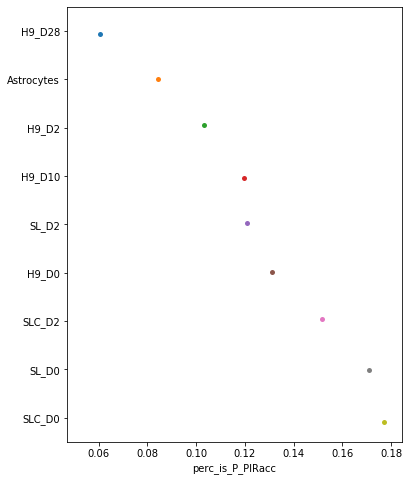

In [44]:
fig = plt.figure(figsize=(6, 8))
sns.stripplot(y = numbers_P_PIRacc.sort_values('perc_is_P_PIRacc').index, x= numbers_P_PIRacc.sort_values('perc_is_P_PIRacc').perc_is_P_PIRacc)

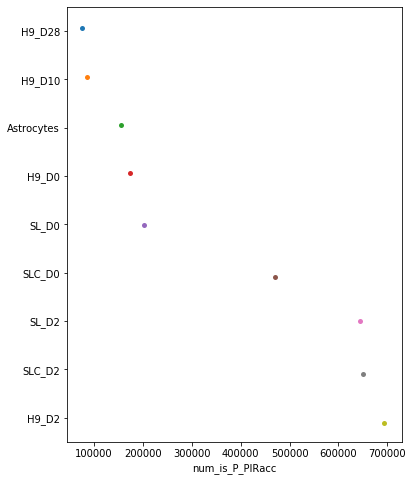

In [45]:
fig = plt.figure(figsize=(6, 8))
sns.stripplot(y = numbers_P_PIRacc.sort_values('num_is_P_PIRacc').index, x= numbers_P_PIRacc.sort_values('num_is_P_PIRacc').num_is_P_PIRacc)

In [46]:
%%time
P_PIR_gene_classification={}
for loop_file in sorted(loop_files):
    loop_filename = os.path.basename(loop_file)
    tissue = loop_filename.split('.')[0]
    print(tissue)
    
    # read loop/anchor files
    loop_df = pd.read_csv(loop_file, index_col=0)
    anchor_file = os.path.join(anchor_dir, tissue+'.anchors.csv')
    anchor_df = pd.read_csv(anchor_file, index_col=0)
    
    # read anchor atac annotation
    anchor_annon_file = os.path.join(anchor_annon_dir, tissue+'_annon.bed')
    if not os.path.exists(anchor_annon_file):
        print(tissue, 'not anchor annon file.. skipping')
        continue
    anchor_annon_df = pd.read_csv(anchor_annon_file, names=['chr', 'start', 'stop', 'name', 'atac_chr', 'atac_start', 'atac_stop'], sep='\t')
    anchor_to_count_dict = anchor_annon_df.groupby('name').name.count().to_dict()
    anchors_acc = anchor_to_count_dict.keys()
    
    # read anchor tss annotation
    promoter_anchor_file = os.path.join(promoter_annon_dir, 'promoter_'+tissue+'_annon.bed')
    if not os.path.exists(promoter_anchor_file):
        print(tissue, 'not promoter annon file.. skipping')
        continue
    promoter_anchor_df = pd.read_csv(promoter_anchor_file, names=['chr', 'start', 'stop', 'tss', 'anchor_chr', 'anchor_start', 
                                                             'anchor_stop', 'anchor', 'overlap'], sep='\t')
    promoter_anchors = promoter_anchor_df.anchor.unique()

    
    loop_df['source_P'] = loop_df.source.isin(promoter_anchors)
    loop_df['target_P'] = loop_df.target.isin(promoter_anchors)
    
    loop_df['source_acc'] = loop_df.source.isin(anchors_acc)
    loop_df['target_acc'] = loop_df.target.isin(anchors_acc)   

    loop_df['source_acc_PIR'] = loop_df['source_acc'] & (~loop_df['source_P'])
    loop_df['target_acc_PIR'] = loop_df['target_acc'] & (~loop_df['target_P'])
    
    loop_df['is_P_PIR'] = loop_df['source_P'] ^ loop_df['target_P']    
    loop_df['is_P_PIRacc'] = loop_df['is_P_PIR'] & (loop_df['source_acc_PIR'] | loop_df['target_acc_PIR']) 
    loop_df['both_anchor_acc'] = loop_df['source_acc'] & loop_df['target_acc']
    loop_df['is_Pacc_PIRacc'] = loop_df['is_P_PIR']  & loop_df['both_anchor_acc'] 

    loop_df_P_PIRacc = loop_df[loop_df.is_P_PIRacc]
    loop_df_P_PIRacc['P_column'] = loop_df_P_PIRacc.apply(lambda x: x.source if x.source_P else x.target,axis=1)
    loop_df_P_PIRacc['E_column'] = loop_df_P_PIRacc.apply(lambda x: x.target if x.source_P else x.source,axis=1)
    # get the actual loop
    loop_df_P_PIRacc = loop_df_P_PIRacc.merge(promoter_anchor_df[['anchor','tss']],how='left',left_on='P_column', right_on='anchor')

    # get closest gene to PIRacc
    loop_df_P_PIRacc = loop_df_P_PIRacc.merge(anchors_closest_gene_df[['anchor_name', 'gene', 'dist_to_TSS']],how='left',left_on='E_column', right_on='anchor_name')

    # renaming colummns
    loop_df_P_PIRacc = loop_df_P_PIRacc[['P_column', 'E_column', 'is_Pacc_PIRacc', 'tss', 'gene', 'dist_to_TSS']]
    loop_df_P_PIRacc.columns = ['P_column', 'E_column', 'is_Pacc_PIRacc','tss_of_P', 'nearest_gene_to_PIR','dist_to_nearest_gene']

    # get distal/nearest classification
    loop_df_P_PIRacc['is_nearest_gene'] = loop_df_P_PIRacc.nearest_gene_to_PIR == loop_df_P_PIRacc.tss_of_P

    # get numbers for P-PIRacc loops
    P_PIRacc_types = loop_df_P_PIRacc.groupby(['E_column','nearest_gene_to_PIR']).agg({'tss_of_P':'::'.join,'P_column':'count'}).reset_index()
    P_PIRacc_types['E_loops_to_nearest'] = P_PIRacc_types.apply(lambda x: x.nearest_gene_to_PIR in x.tss_of_P, axis=1)
    P_PIRacc_types['type1_distal_only'] = (~P_PIRacc_types.E_loops_to_nearest)
    P_PIRacc_types['type2_nearest_distal'] = P_PIRacc_types.E_loops_to_nearest & (P_PIRacc_types.P_column>1)
    P_PIRacc_types['type3_nearest_only'] = P_PIRacc_types.E_loops_to_nearest & (P_PIRacc_types.P_column==1)
    num_enhancers = len(P_PIRacc_types)
    numE_type1_distal_only = len(P_PIRacc_types[P_PIRacc_types.type1_distal_only])
    numE_type2_nearest_distal = len(P_PIRacc_types[P_PIRacc_types.type2_nearest_distal])
    numE_type3_nearest_only = len(P_PIRacc_types[P_PIRacc_types.type3_nearest_only])    
    num_target_genes = P_PIRacc_types.P_column.sum()
    numP_type1_distal_only = P_PIRacc_types[P_PIRacc_types.type1_distal_only].P_column.sum()
    numP_type2_nearest_distal = P_PIRacc_types[P_PIRacc_types.type2_nearest_distal].P_column.sum()
    numP_type3_nearest_only = P_PIRacc_types[P_PIRacc_types.type3_nearest_only].P_column.sum()
    

    # get numbers for Pacc-PIRacc loops
    loop_df_Pacc_PIRacc = loop_df_P_PIRacc[loop_df_P_PIRacc.is_Pacc_PIRacc]
    Pacc_PIRacc_types = loop_df_Pacc_PIRacc.groupby(['E_column','nearest_gene_to_PIR']).agg({
        'tss_of_P':'::'.join,'P_column':'count',}).reset_index()
    Pacc_PIRacc_types['E_loops_to_nearest'] = Pacc_PIRacc_types.apply(lambda x: x.nearest_gene_to_PIR in x.tss_of_P, axis=1)
    Pacc_PIRacc_types['type1_distal_only'] = (~Pacc_PIRacc_types.E_loops_to_nearest) 
    Pacc_PIRacc_types['type2_nearest_distal'] = Pacc_PIRacc_types.E_loops_to_nearest & (Pacc_PIRacc_types.P_column>1)
    Pacc_PIRacc_types['type3_nearest_only'] = Pacc_PIRacc_types.E_loops_to_nearest & (Pacc_PIRacc_types.P_column==1)
    num_enhancers_Pacc = len(Pacc_PIRacc_types)
    numE_type1_distal_only_Pacc = len(Pacc_PIRacc_types[Pacc_PIRacc_types.type1_distal_only])
    numE_type2_nearest_distal_Pacc = len(Pacc_PIRacc_types[Pacc_PIRacc_types.type2_nearest_distal])
    numE_type3_nearest_only_Pacc = len(Pacc_PIRacc_types[Pacc_PIRacc_types.type3_nearest_only])
    num_target_genes_Pacc = Pacc_PIRacc_types.P_column.sum()
    numP_type1_distal_only_Pacc = Pacc_PIRacc_types[Pacc_PIRacc_types.type1_distal_only].P_column.sum()
    numP_type2_nearest_distal_Pacc = Pacc_PIRacc_types[Pacc_PIRacc_types.type2_nearest_distal].P_column.sum()
    numP_type3_nearest_only_Pacc = Pacc_PIRacc_types[Pacc_PIRacc_types.type3_nearest_only].P_column.sum()
    
    
    P_PIR_gene_classification[tissue] = {'num_loops_P_PIRacc':len(loop_df_P_PIRacc),
                                         'num_enhancers_in_P_PIRacc':num_enhancers,
                                         'numE_type1_distal_only_in_P_PIRacc':numE_type1_distal_only,
                                         'numE_type2_nearest_distal_in_P_PIRacc':numE_type2_nearest_distal,
                                         'numE_type3_nearest_only_in_P_PIRacc':numE_type3_nearest_only,
                                         'num_target_genes_in_P_PIRacc':num_target_genes,
                                         'numP_type1_distal_only':numP_type1_distal_only,
                                         'numP_type2_nearest_distal':numP_type2_nearest_distal,
                                         'numP_type3_nearest_only':numP_type3_nearest_only,
                                         
                                         'num_loops_Pacc_PIRacc':len(loop_df_Pacc_PIRacc),
                                         'num_enhancers_in_Pacc_PIRacc':num_enhancers_Pacc,
                                         'numE_type1_distal_only_in_Pacc_PIRacc':numE_type1_distal_only_Pacc,
                                         'numE_type2_nearest_distal_in_Pacc_PIRacc':numE_type2_nearest_distal_Pacc,
                                         'numE_type3_nearest_only_in_Pacc_PIRacc':numE_type3_nearest_only_Pacc, 
                                         'num_target_genes_in_Pacc_PIRacc':num_target_genes_Pacc,
                                         'numP_type1_distal_only_Pacc':numP_type1_distal_only_Pacc,
                                         'numP_type2_nearest_distal_Pacc':numP_type2_nearest_distal_Pacc,
                                         'numP_type3_nearest_only_Pacc':numP_type3_nearest_only_Pacc
                                           
    }   

Astrocytes


/Users/mguo123/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/mguo123/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


H9_D0
H9_D10
H9_D2
H9_D28
SLC_D0
SLC_D2
SL_D0
SL_D2
CPU times: user 4min 35s, sys: 2.46 s, total: 4min 38s
Wall time: 3min 30s


In [47]:
pd.DataFrame.from_dict(P_PIR_gene_classification,orient='index')

,num_loops_P_PIRacc,num_enhancers_in_P_PIRacc,numE_type1_distal_only_in_P_PIRacc,numE_type2_nearest_distal_in_P_PIRacc,numE_type3_nearest_only_in_P_PIRacc,num_target_genes_in_P_PIRacc,numP_type1_distal_only,numP_type2_nearest_distal,numP_type3_nearest_only,num_loops_Pacc_PIRacc,num_enhancers_in_Pacc_PIRacc,numE_type1_distal_only_in_Pacc_PIRacc,numE_type2_nearest_distal_in_Pacc_PIRacc,numE_type3_nearest_only_in_Pacc_PIRacc,num_target_genes_in_Pacc_PIRacc,numP_type1_distal_only_Pacc,numP_type2_nearest_distal_Pacc,numP_type3_nearest_only_Pacc
Astrocytes,241235,15137,3188,11866,83,241235,40944,200208,83,37355,8855,7797,866,192,37355,30620,6543,192
H9_D0,255247,30791,9647,19873,1271,255247,54057,199919,1271,55020,15984,12438,2543,1003,55020,38942,15075,1003
H9_D10,133816,18146,6292,11013,841,133816,32460,100515,841,27618,8138,6732,1033,373,27618,20830,6415,373
H9_D2,950434,45106,7522,37039,545,950434,138973,810916,545,143820,32851,27353,4215,1283,143820,113987,28550,1283
H9_D28,122050,14443,4378,9633,432,122050,26630,94988,432,14646,5156,4377,547,232,14646,11620,2794,232
SLC_D0,672211,44888,11348,32717,823,672211,111826,559562,823,175823,32067,24833,6066,1168,175823,122225,52430,1168
SLC_D2,886043,57243,12612,43718,913,886043,145400,739730,913,188033,41116,32180,7095,1841,188033,135294,50898,1841
SL_D0,292572,38730,13888,23079,1763,292572,72384,218425,1763,74057,21843,16760,3648,1435,74057,51317,21305,1435
SL_D2,882508,49343,9478,39199,666,882508,141756,740086,666,155846,35160,28626,5103,1431,155846,118428,35987,1431


In [48]:
P_PIR_gene_classification_df = pd.DataFrame.from_dict(P_PIR_gene_classification,orient='index')
P_PIR_gene_classification_df.to_csv(os.path.join(save_dir, 'P_PIR_gene_classification_df.csv'))
P_PIR_gene_classification_normal_df = P_PIR_gene_classification_df[P_PIR_gene_classification_df.index.isin(normal_tissues)]
P_PIR_gene_classification_normal_df.to_csv(os.path.join(save_dir, 'P_PIR_gene_classification_normal_df.csv'))


# 4. get snp - egene 

# 4A. create snp-egene table

for each snp `name`=`rsid`_`disease_name` 
1. annotate to anchor regions with snp data
2. annotate anchor regions with TSS data (already done just read in)
3. merge with loops
4. a SNP-egene pair where a SNP and egene are found on the same loop (regardless if found on same anchor point or different one)
5. (NOT DONE BECAUSE 1615 combination of diseases, ###TODO make better tissue disease matcher ) add a potential tissue match



In [49]:
snp_file = '../data/external/snp_list_noncancer.csv'
snp_orig_df = pd.read_csv(snp_file, index_col=0)
snp_orig_df['name'] = snp_orig_df.snp + '__' + snp_orig_df.disease
diseases = snp_orig_df.disease.unique()
snp_orig_df['stop'] = snp_orig_df['loc']+1
snp_df = snp_orig_df[['chr', 'loc', 'stop', 'name']]
snp_df.columns = ['chr', 'start', 'stop', 'name']


snp_df.to_csv('../data/external/snp_list_combined.bed',sep='\t',header=None, index=None)
snp_bed = pybedtools.BedTool.from_dataframe(snp_df).sort()

print(snp_df.shape)
print(len(diseases))
snp_df[:5]

(65019, 4)
1575


,chr,start,stop,name
0,chr11,78128047,78128048,rs881361__Alzheimer Dementia
1,chr5,153652930,153652931,rs73281459__Schizophrenia
2,chr5,153656738,153656739,rs73279671__Schizophrenia
3,chr8,109260581,109260582,rs9969614__Dupuytren Disease
4,chr10,102027407,102027408,rs12784396__Psoriasis


In [50]:
# melanocyte_list = ['Melanocytes','COLO_SCR_DMSO', 'COLO_SCR_PLX', 'COLO_shMITF_DMSO', 'COLO_shMITF_PLX',
#                    'WM_SCR_DMSO', 'WM_SCR_PLX', 'WM_shMITF_DMSO', 'WM_shMITF_PLX']
# skin_list = ['GDSD0','GDSD3','GDSD6', 'A431-CTRLi', 'A431-p63i','CAL27-CTRLi', 'CAL27-p63i',
#              'D0-CTRLi', 'D0-p63i', 'D3-CTRLi', 'D3-p63i', 'D6-CTRLi', 'D6-p63i','SCC13-CTRLi', 'SCC13-p63i']
# disease_to_tissue = {
#     '':[],
#     'paad':['Pancreas'], 'brca,ovca':['HMEC','Ovarian'], 'ovca,paad':['Ovarian','Pancreas'], 
#     'melanoma':melanocyte_list, 
#     'colon':['Colon'], 
#     'kidney,skin':['Renal']+skin_list +melanocyte_list, 'colon,lung':['Colon','Airway'], 
#     'bladder,lung,skin':['Bladder','Airway']+skin_list +melanocyte_list,
#     'colon,endometrial':['Colon','Uterine'], 'brca,lung':['HMEC','Airway'], 'kidney':['Renal'], 'Thyroid':['Thy'], 'thyroid':['Thy'], 
#     'endometrial,ovca':['Uter','Ova'], 'skin':['GDSD0','GDSD3','GDSD6','MC'], 'brca':['HMEC'], 'esophagus':['Eso'], 'prad':['Pros'], 
#     'endometrial':['Uter'], 'ovca':['Ova'], 'lung,skin':['Air','GDSD0','GDSD3','GDSD6','MC'], 'lung,ovca':['Air','Ova'], 
#     'cervical':['Uter'], 'lung':['Air'], 'bladder':['Blad'], 'brca,melanoma':['HMEC','MC'], 'lymphoma':['GM12878'], 
#     'colon,melanoma':['Colon','MC'], 'brain':['Astro'], 'melanoma,skin':['GDSD0','GDSD3','GDSD6','MC']
    
# }

In [51]:
%%time
snp_egene_df = pd.DataFrame(columns=['TSS',	'snp_id',	'disease',	'tissue'])
for tissue in tissues:
    # 1. annotate anchors with snp info 
    anchor = pybedtools.BedTool('../data/interim/merged/anchors_bed_sort/'+tissue+'_sort.bed')
    anchor_snp_annon_df = anchor.intersect(snp_bed, wa=True, wb=True, sorted=True, names='anchor').to_dataframe()
    anchor_snp_annon_df.columns = ['chr', 'start', 'stop', 'anchor', 'chr_snp','start_snp', 'stop_snp', 'snp_name']
    anchor_snp_annon_df_filt = anchor_snp_annon_df[['anchor', 'snp_name']]

    # 2. read in tss annotation of anchors
    promoter_file = '../data/interim/annon/promoter_anchors/promoter_'+tissue+'_annon.bed'
    if not os.path.exists(promoter_file):
        print(promoter_file,'does not exist .. skipping')
        continue
    anchor_tss_annon_df = pd.read_csv(promoter_file,sep='\t', header=None)
    anchor_tss_annon_df.columns = ['chr_p','start_p','stop_p','TSS','chr_f','start_f','stop_f','anchor','overlap']
    anchor_tss_annon_df_filt = anchor_tss_annon_df.sort_values('overlap', ascending=False).drop_duplicates(['TSS']).sort_index()
    anchor_tss_annon_df_filt = anchor_tss_annon_df_filt[['anchor','TSS']]

    # 3. merge with loops: read in loop information and annotate loops with snp and tss anchor
    loop_file = '../data/interim/merged/loops/'+tissue+'.loops.csv'
    loop_df = pd.read_csv(loop_file,index_col=0)
    loop_df_rev = loop_df.copy()
    loop_df_rev.columns = ['target','source','count']
    loop_df_bi = pd.concat([loop_df, loop_df_rev],sort=False)
    loop_df_bi = loop_df_bi.merge(anchor_snp_annon_df_filt,how='left',left_on='source',right_on='anchor' )
    loop_df_bi.drop('anchor',axis=1,inplace=True)
    loop_df_bi = loop_df_bi.merge(anchor_snp_annon_df_filt,how='inner',left_on='target',right_on='anchor', suffixes=['_s','_t'] )
    loop_df_bi.drop('anchor',axis=1,inplace=True)
    loop_df_bi = loop_df_bi.merge(anchor_tss_annon_df_filt,how='left',left_on='source',right_on='anchor' )
    loop_df_bi.drop('anchor',axis=1,inplace=True)
    loop_df_bi = loop_df_bi.merge(anchor_tss_annon_df_filt,how='inner',left_on='target',right_on='anchor', suffixes=['_s','_t'] )
    loop_df_bi.drop('anchor',axis=1,inplace=True)

    # 4. a SNP-egene pair where a SNP and egene are found on the same loop (regardless if found on same anchor point or different one)
    tissue_snp_df = loop_df_bi[['snp_name_s',	'snp_name_t',	'TSS_s',	'TSS_t']].fillna('')
    tissue_snp_df['snp_name'] = tissue_snp_df.snp_name_s + '::' + tissue_snp_df.snp_name_t
    tissue_snp_df['TSS'] = tissue_snp_df.TSS_s + '::' + tissue_snp_df.TSS_t
    tissue_snp_df['TSS'] = tissue_snp_df.TSS.str.strip('::')
    tissue_snp_df['snp_name'] = tissue_snp_df.snp_name.str.strip('::')
    tissue_snp_df = tissue_snp_df[['snp_name','TSS']]
    tissue_snp_df = pd.DataFrame(tissue_snp_df.snp_name.str.split('::').to_list(), index=tissue_snp_df.TSS).stack().reset_index('TSS')
    tissue_snp_df.columns = ['TSS', 'snp_name']
    tissue_snp_df = pd.DataFrame(tissue_snp_df.TSS.str.split('::').to_list(), index=tissue_snp_df.snp_name).stack().reset_index([0,'snp_name'])
    tissue_snp_df.columns = ['snp_name', 'TSS']
    tissue_snp_df[['snp_id','disease']]=tissue_snp_df.snp_name.str.split('__',expand=True)
    tissue_snp_df['tissue'] = tissue
    tissue_snp_df.drop('snp_name',axis=1,inplace=True)
    
    # 5. add to overall dataframe
    snp_egene_df = pd.concat([snp_egene_df, tissue_snp_df])
    print(tissue, snp_egene_df.shape)
    

/Users/mguo123/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Astrocytes (3525290, 4)


/Users/mguo123/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


H9_D0 (5982989, 4)
H9_D10 (7871677, 4)


/Users/mguo123/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


H9_D2 (15469189, 4)


/Users/mguo123/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


H9_D28 (17519804, 4)


/Users/mguo123/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


SLC_D0 (22092600, 4)


/Users/mguo123/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


SLC_D2 (27570105, 4)


/Users/mguo123/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


SL_D0 (30047693, 4)


/Users/mguo123/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


SL_D2 (35676018, 4)
CPU times: user 8min 54s, sys: 21.7 s, total: 9min 16s
Wall time: 6min 6s


In [52]:
snp_egene_df.dropna(inplace=True)
snp_egene_df.to_csv(os.path.join(save_dir,'snp_egene_df.csv'))

In [53]:
snp_egene_normal_df = snp_egene_df[snp_egene_df.tissue.isin(normal_tissues)]
snp_egene_normal_df.to_csv(os.path.join(save_dir, 'snp_egene_normal_df.csv'))

In [54]:
snp_egene_df.shape, snp_egene_normal_df.shape

((33510778, 4), (33510778, 4))

# 5. get snp egene distance

In [55]:
TSS_df = pd.read_csv('../data/external/TSS_annon_hg19.csv',index_col=0)


In [56]:
snp_egene_df_wdist = snp_egene_df.merge(TSS_df[['chr','loc','TSS']], how='left', on='TSS')

In [57]:
%%time
# takes awhile (~1-2 min)
snp_egene_df_wdist['name'] = snp_egene_df_wdist.snp_id + '__' + snp_egene_df_wdist.disease
snp_egene_df_wdist = snp_egene_df_wdist.merge(snp_df[['chr','start','name']], how='left', on='name')
snp_egene_df_wdist.dropna(inplace=True)

CPU times: user 5min 35s, sys: 3min 3s, total: 8min 38s
Wall time: 9min 10s


In [58]:
snp_egene_df_wdist.shape

(355476582, 9)

In [59]:
snp_egene_df_wdist = snp_egene_df_wdist[snp_egene_df_wdist.chr_x==snp_egene_df_wdist.chr_y]
snp_egene_df_wdist.shape

(355474873, 9)

In [60]:
snp_egene_df_wdist['distance'] = abs(snp_egene_df_wdist['loc'] - snp_egene_df_wdist['start'])
snp_egene_df_wdist = snp_egene_df_wdist[['TSS',	'snp_id',	'disease',	'tissue', 'distance']]

In [61]:
snp_egene_df_wdist.distance.describe()

count    3.554749e+08
mean     1.446384e+05
std      3.312608e+05
min      1.000000e+00
25%      9.490000e+03
50%      1.202700e+04
75%      7.590800e+04
max      2.024192e+06
Name: distance, dtype: float64

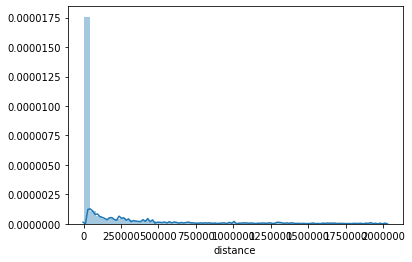

In [62]:
sns.distplot(snp_egene_df_wdist.distance)

In [63]:
snp_egene_df_wdist.to_csv(os.path.join(save_dir,'snp_egene_df_wdist.csv'))
snp_egene_normal_df_wdist = snp_egene_df_wdist[snp_egene_df_wdist.tissue.isin(normal_tissues)]
snp_egene_normal_df_wdist.to_csv(os.path.join(save_dir, 'snp_egene_normal_df_wdist.csv'))